In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from torch.utils.data import DataLoader
import torch.optim as optim
from torchvision import datasets, transforms
from torchvision.datasets import DatasetFolder, ImageFolder
import torchvision.models as models
import torch.nn.functional as F
import torch
import torch.nn as nn

import matplotlib.pyplot as plt

import random
import os

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [3]:
random.seed(100)
cwd = os.getcwd()  # Get the current working directory (cwd)
cwd2 = cwd + '/input/steam.csv'

In [4]:
rawdata = pd.read_csv(cwd2)
rawdata

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27070,1065230,Room of Pandora,2019-04-24,1,SHEN JIAWEI,SHEN JIAWEI,windows,0,Single-player;Steam Achievements,Adventure;Casual;Indie,Adventure;Indie;Casual,7,3,0,0,0,0-20000,2.09
27071,1065570,Cyber Gun,2019-04-23,1,Semyon Maximov,BekkerDev Studio,windows,0,Single-player,Action;Adventure;Indie,Action;Indie;Adventure,0,8,1,0,0,0-20000,1.69
27072,1065650,Super Star Blast,2019-04-24,1,EntwicklerX,EntwicklerX,windows,0,Single-player;Multi-player;Co-op;Shared/Split ...,Action;Casual;Indie,Action;Indie;Casual,24,0,1,0,0,0-20000,3.99
27073,1066700,New Yankee 7: Deer Hunters,2019-04-17,1,Yustas Game Studio,Alawar Entertainment,windows;mac,0,Single-player;Steam Cloud,Adventure;Casual;Indie,Indie;Casual;Adventure,0,2,0,0,0,0-20000,5.19


In [5]:
df = rawdata[['release_date', 'genres']]
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_date'] = df['release_date'].dt.year

miny = df['release_date'].min()
maxy = df['release_date'].max()
print(miny, maxy)

all_genres = []
for row in df.index:
    all_genres = all_genres + df.loc[row, 'genres'].split(';')
all_genres = list(set(all_genres))

print(all_genres)

C:\Users\AH_lj\AppData\Local\Temp\ipykernel_31128\4004631645.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['release_date'] = pd.to_datetime(df['release_date'])
C:\Users\AH_lj\AppData\Local\Temp\ipykernel_31128\4004631645.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['release_date'] = df['release_date'].dt.year


1997 2019
['Strategy', 'Massively Multiplayer', 'Nudity', 'Education', 'Animation & Modeling', 'Tutorial', 'Software Training', 'Casual', 'Simulation', 'Sexual Content', 'Action', 'Game Development', 'Early Access', 'Gore', 'Documentary', 'Adventure', 'Accounting', 'Indie', 'Video Production', 'Violent', 'Web Publishing', 'Racing', 'Design & Illustration', 'Audio Production', 'Utilities', 'Free to Play', 'Sports', 'Photo Editing', 'RPG']


In [6]:
df.sort_values(by=['release_date'], inplace=True)
df

C:\Users\AH_lj\AppData\Local\Temp\ipykernel_31128\3447343310.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by=['release_date'], inplace=True)


,release_date,genres
2685,1997,Action;Indie;Racing
6,1998,Action
1,1999,Action
4,1999,Action
5,2000,Action
...,...,...
20638,2019,Action;Adventure;Indie;Simulation;Early Access
25291,2019,Strategy
25292,2019,Simulation
25281,2019,Adventure;Casual;Indie;Simulation;Strategy


In [7]:
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio

fig = go.Figure()

x = [str(i) for i in range(2005, maxy + 1)]

genreList = ['Free to Play', 'RPG', 'Simulation', 'Strategy', 'Adventure', 'Casual', 'Action', 'Indie']
colorList = ['#EF553B', '#00CC96', '#AB63FA', '#FF97FF', '#19D3F3', '#FFA15A', '#FF6692', '#636EFA']
otherList = list(set(all_genres) - set(genreList) - set(['Early Access']))

y = [0 for i in range(2005, maxy + 1)]
for genre in otherList:
    ind = 0
    for year in range(2005, maxy + 1):
        y[ind] = y[ind] + len(df[(df['release_date'] == year) & (df['genres'].str.contains(genre))])
        ind = ind + 1
print(y)
fig.add_trace(go.Scatter(
        x=x, y=y,
        mode='lines+markers',
        line=dict(width=0.5, color = '#FF9DA6'), stackgroup='one',groupnorm='percent', name = 'Others'))

for (genre, color) in zip(genreList, colorList):
    y = []
    ind = 0
    for year in range(2005, maxy + 1):
        y = y + [len(df[(df['release_date'] == year) & (df['genres'].str.contains(genre))])]
        ind = ind + 1
    fig.add_trace(go.Scatter(
        x=x, y=y,
        mode='lines+markers',
        line=dict(width=0.5, color = color), stackgroup='one',groupnorm='percent', name = genre))

fig.update_layout(
    showlegend=True,
    xaxis=dict(type='category', title='Year'),
    yaxis=dict(type='linear', range=[1, 100], ticksuffix='%', title = 'Percentage of Games'),
    paper_bgcolor='rgba(0,0,0,0)')

fig.show()
pio.write_image(fig, "genre_year.svg")


[0, 4, 5, 13, 22, 11, 29, 41, 68, 198, 365, 800, 1769, 1869, 290]


In [8]:
ep_df = pd.DataFrame()

ep_df['genre'] = all_genres
for year in range(miny, maxy + 1):
    y = []
    s = 0
    for genre in all_genres:
        y = y + [len(df[(df['release_date'] == year) & (df['genres'].str.contains(genre))])]
    ep_df[year] = y
for genre in all_genres:
    s = 0
    for year in range(miny, maxy + 1):
        s = s + ep_df.loc[ep_df['genre'] == genre][year].values[0]
    print(genre, s)

ep_df = ep_df.drop(ep_df[ep_df['genre'] == 'Early Access'].index)
ep_df.to_csv(cwd + '/file/plot.csv')
print(ep_df)

Strategy 5247
Massively Multiplayer 723
Nudity 266
Education 51
Animation & Modeling 79
Tutorial 1
Software Training 31
Casual 10210
Simulation 5194
Sexual Content 245
Action 11903
Game Development 17
Early Access 2954
Gore 537
Documentary 1
Adventure 10032
Accounting 6
Indie 19421
Video Production 38
Violent 843
Web Publishing 28
Racing 1024
Design & Illustration 87
Audio Production 29
Utilities 146
Free to Play 1704
Sports 1322
Photo Editing 12
RPG 4311
                    genre  1997  1998  1999  2000  2001  2002  2003  2004  \
0                Strategy     0     0     0     0     1     0     1     0   
1   Massively Multiplayer     0     0     0     0     0     0     0     0   
2                  Nudity     0     0     0     0     0     0     0     0   
3               Education     0     0     0     0     0     0     0     0   
4    Animation & Modeling     0     0     0     0     0     0     0     0   
5                Tutorial     0     0     0     0     0     0     0     0   
6

In [9]:
for genre in all_genres:
    print(genre, len(rawdata[rawdata['genres'].str.contains(genre)]))

Strategy 5247
Massively Multiplayer 723
Nudity 266
Education 51
Animation & Modeling 79
Tutorial 1
Software Training 31
Casual 10210
Simulation 5194
Sexual Content 245
Action 11903
Game Development 17
Early Access 2954
Gore 537
Documentary 1
Adventure 10032
Accounting 6
Indie 19421
Video Production 38
Violent 843
Web Publishing 28
Racing 1024
Design & Illustration 87
Audio Production 29
Utilities 146
Free to Play 1704
Sports 1322
Photo Editing 12
RPG 4311


In [10]:
rawdata = rawdata.drop('steamspy_tags', axis=1)
rawdata = rawdata.drop('developer', axis=1)
rawdata = rawdata.drop('publisher', axis=1)
rawdata = rawdata.drop('owners', axis=1)
rawdata


,appid,name,release_date,english,platforms,required_age,categories,genres,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price
0,10,Counter-Strike,2000-11-01,1,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,0,124534,3339,17612,317,7.19
1,20,Team Fortress Classic,1999-04-01,1,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,0,3318,633,277,62,3.99
2,30,Day of Defeat,2003-05-01,1,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,0,3416,398,187,34,3.99
3,40,Deathmatch Classic,2001-06-01,1,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,0,1273,267,258,184,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,0,5250,288,624,415,3.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27070,1065230,Room of Pandora,2019-04-24,1,windows,0,Single-player;Steam Achievements,Adventure;Casual;Indie,7,3,0,0,0,2.09
27071,1065570,Cyber Gun,2019-04-23,1,windows,0,Single-player,Action;Adventure;Indie,0,8,1,0,0,1.69
27072,1065650,Super Star Blast,2019-04-24,1,windows,0,Single-player;Multi-player;Co-op;Shared/Split ...,Action;Casual;Indie,24,0,1,0,0,3.99
27073,1066700,New Yankee 7: Deer Hunters,2019-04-17,1,windows;mac,0,Single-player;Steam Cloud,Adventure;Casual;Indie,0,2,0,0,0,5.19


In [11]:
rawdata['release_date'] = pd.to_datetime(rawdata['release_date'])
rawdata['release_date'] = rawdata.apply(lambda row: row['release_date'].timestamp(), axis=1).astype(int)
rawdata['positive_ratio'] = rawdata.apply(lambda row: row['positive_ratings'] / (row['positive_ratings'] + row['negative_ratings']), axis=1).astype(float)
rawdata
rawdata['positive_ratio']

0        0.973888
1        0.839787
2        0.895648
3        0.826623
4        0.947996
           ...   
27070    1.000000
27071    0.888889
27072    0.000000
27073    1.000000
27074    1.000000
Name: positive_ratio, Length: 27075, dtype: float64

In [12]:
rawdata = rawdata.drop(rawdata[rawdata.positive_ratings + rawdata.negative_ratings < 50].index)
rawdata = rawdata.drop('positive_ratings', axis = 1)
rawdata = rawdata.drop('negative_ratings', axis = 1)
rawdata

,appid,name,release_date,english,platforms,required_age,categories,genres,achievements,average_playtime,median_playtime,price,positive_ratio
0,10,Counter-Strike,973036800,1,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,0,17612,317,7.19,0.973888
1,20,Team Fortress Classic,922924800,1,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,0,277,62,3.99,0.839787
2,30,Day of Defeat,1051747200,1,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,0,187,34,3.99,0.895648
3,40,Deathmatch Classic,991353600,1,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,0,258,184,3.99,0.826623
4,50,Half-Life: Opposing Force,941414400,1,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,0,624,415,3.99,0.947996
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26989,1053060,KillStreak.tv,1554940800,1,windows;mac,0,Single-player;Multi-player;Online Multi-Player,Action;Free to Play,0,0,0,0.00,0.787234
27012,1055090,Embark,1555545600,1,windows,0,Single-player;Steam Achievements;Steam Cloud;S...,Indie;Simulation;Strategy;Early Access,21,0,0,19.49,0.829545
27013,1055140,10-4 Indirect Contact,1555286400,1,windows,0,Single-player;Steam Cloud,Indie;Strategy,0,0,0,2.89,0.905660
27030,1057430,Geometry May. I swear it's a nice free game,1555372800,1,windows,0,Single-player;Steam Achievements;Full controll...,Action;Adventure;Free to Play;Indie,7,0,0,0.00,0.846939


In [13]:
plotdf = pd.DataFrame({'genre': pd.Series(dtype='str'), 'positive_ratio': pd.Series(dtype='float')})
cnt = 0
for row in rawdata.index:
    cnt = cnt + 1
    if cnt % 1000 == 0:
        print(cnt)
    curList = rawdata.loc[row, 'genres'].split(';')
    rawdata.loc[row, 'positive_ratio']
    for genre in curList:
        plotdf = pd.concat([plotdf, pd.DataFrame({'genre': [genre], 'positive_ratio': [rawdata.loc[row, 'positive_ratio']]}).reset_index(drop=True)], ignore_index=True)
plotdf

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000


,genre,positive_ratio
0,Action,0.973888
1,Action,0.839787
2,Action,0.895648
3,Action,0.826623
4,Action,0.947996
...,...,...
32947,Adventure,0.776923
32948,Free to Play,0.776923
32949,Indie,0.776923
32950,RPG,0.776923


In [14]:
fig = px.box(plotdf, x="genre", y="positive_ratio")
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()

In [48]:
fig = go.Figure()

genreList = ['Racing', 'Casual', 'Adventure', 'RPG', 'Strategy', 'Early Access', 'Massively Multiplayer', 
             'Violent', 'Animation & Modeling', 'Indie', 'Action', 'Nudity', 'Sexual Content', 'Sports',
             'Free to Play', 'Simulation']
for genre in genreList:
    fig.add_trace(go.Box(
        y=plotdf[plotdf['genre'] == genre]['positive_ratio'],
        name=genre,
        boxpoints='outliers', # can be outliers, or suspectedoutliers, or False
        boxmean=True # represent the mean of the box plot
    ))
fig.update_layout(title_text='Percentage of Positive Reviews Among Different Game Genres', title_x=0.5, yaxis_tickformat = '.0%', paper_bgcolor='rgba(0,0,0,0)')

fig.show()
pio.write_image(fig, "boxchart.svg")

In [16]:
df_pg = sns.load_dataset('penguins', cache=True, data_home=None)
df_pg.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [17]:
#select varibles for plotting
df_select = rawdata[['price', 'positive_ratio', 'genres']]
df_select = df_select[df_select['genres'].str.contains('Action')]
df_select.dropna(inplace=True)
df_select = df_select[df_select.index % 10 == 0]

#sclae the values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_std = pd.DataFrame(scaler.fit_transform(df_select.iloc[:,0:2]),
                      columns=['price', 'positive_ratio'])
df_std.head()

,price,positive_ratio
0,-0.130136,1.329605
1,-0.130136,1.231367
2,-0.130136,1.194800
3,-0.508688,1.097990
4,-0.473199,0.155546


In [18]:
color_dict = {'Cluster 1':'deepskyblue',
              'Cluster 2':'orangered',
              'Cluster 3':'forestgreen',
              'Cluster 4':'darkviolet'}

c:\Users\AH_lj\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.



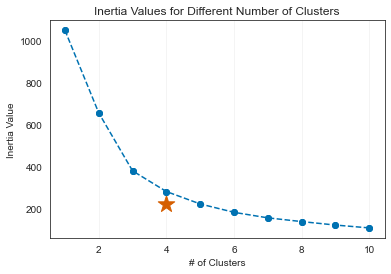

In [49]:
label_dict = {0:'Cluster 1', 1:'Cluster 2', 2:'Cluster 3', 3:'Cluster 4'}

from sklearn.cluster import KMeans

inertia_list = []
for i in range(1, 11):
    kmeans_model = KMeans(n_clusters = i, init = "k-means++")
    kmeans_model.fit(df_std[['price', 'positive_ratio']])
    inertia_list.append(kmeans_model.inertia_)




plt.plot(range(1,11),inertia_list, 'o--', color='#0072b2')
plt.scatter(range(1,11),inertia_list, color='#0072b2')
plt.scatter(4, inertia_list[4], marker="*", s=300, color='#d55e00')
plt.xlabel("# of Clusters")
plt.ylabel("Inertia Value")
plt.title("Inertia Values for Different Number of Clusters")
plt.grid(axis='x', color='0.95')
plt.savefig("inertia.svg", format="svg", transparent = 'True')
plt.show()

In [20]:
kmeans_model = KMeans(n_clusters = 4, init = "k-means++")
kmeans_model.fit(df_std[['price', 'positive_ratio']])
inertia_list.append(kmeans_model.inertia_)

x_avg = df_std['price'].mean()
y_avg = df_std['positive_ratio'].mean()
centroids = [list(i) for i in list(kmeans_model.cluster_centers_)]

df_std['cluster'] = kmeans_model.labels_
df_std['Clusters'] = [label_dict.get(i) for i in df_std.cluster]
df_std

,price,positive_ratio,cluster,Clusters
0,-0.130136,1.329605,3,Cluster 4
1,-0.130136,1.231367,3,Cluster 4
2,-0.130136,1.194800,3,Cluster 4
3,-0.508688,1.097990,3,Cluster 4
4,-0.473199,0.155546,3,Cluster 4
...,...,...,...,...
521,-0.248434,0.669350,3,Cluster 4
522,-0.785505,1.154353,3,Cluster 4
523,-0.365548,1.438351,3,Cluster 4
524,0.851733,1.190954,1,Cluster 2


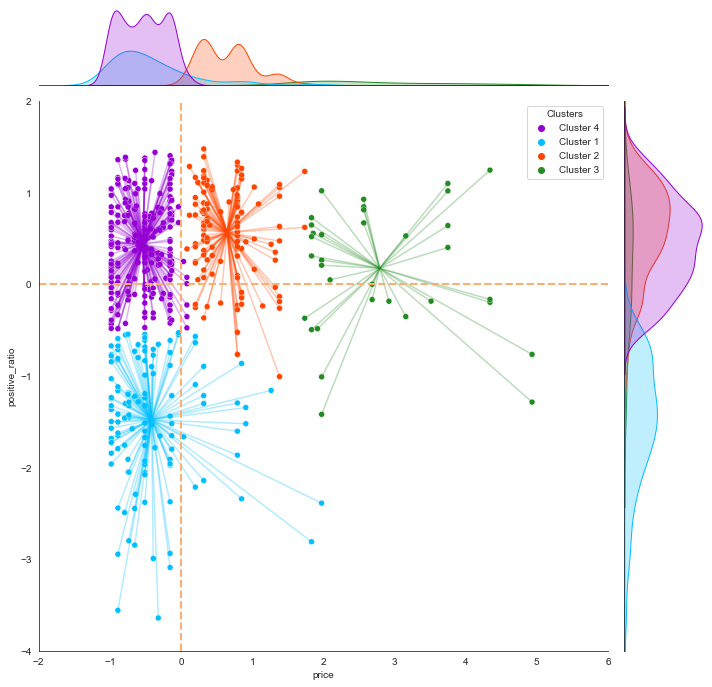

In [21]:
list_penguins = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']
sns.set_style('white')

ax = sns.jointplot(x=df_std.price, y=df_std.positive_ratio,
              hue=df_std.Clusters,
              palette=color_dict,
              xlim=[-2,6], ylim=[-4,2],
              height=10, ratio=6
             )
for i,p in zip(centroids,list_penguins):
    df = df_std[df_std.Clusters==p]
    for pc1, pc2 in zip(df.price, df.positive_ratio):
        color = color_dict.get(p)
        ax.ax_joint.plot([i[0],pc1],[i[1],pc2], lw=1.5,
                         color=color, alpha=0.3,
                        )
#add avagare line
ax.ax_joint.axvline(x=x_avg, lw=2, c='#FFAE6D', ls='--')
ax.ax_joint.axhline(y=y_avg, lw=2, c='#FFAE6D', ls='--')

ax.fig.subplots_adjust(top=0.95)
plt.savefig("test.png", format="png")
plt.show()

In [22]:
all_categories = []
for row in rawdata.index:
    all_categories = all_categories + rawdata.loc[row, 'categories'].split(';')
all_categories = list(set(all_categories))
print(len(all_categories))
print(all_categories)
for category in all_categories:
    rawdata[category] = rawdata.apply(lambda row: int(category in row['categories'].split(';')), axis=1).astype(int)
rawdata = rawdata.drop('categories', axis=1)
rawdata

29
['In-App Purchases', 'SteamVR Collectibles', 'Commentary available', 'Cross-Platform Multiplayer', 'Stats', 'Shared/Split Screen', 'Local Multi-Player', 'Online Multi-Player', 'Online Co-op', 'Includes level editor', 'VR Support', 'Steam Cloud', 'Steam Workshop', 'Mods', 'Captions available', 'Partial Controller Support', 'Valve Anti-Cheat enabled', 'Full controller support', 'Steam Trading Cards', 'MMO', 'Includes Source SDK', 'Multi-player', 'Co-op', 'Mods (require HL2)', 'Steam Turn Notifications', 'Steam Leaderboards', 'Single-player', 'Local Co-op', 'Steam Achievements']


,appid,name,release_date,english,platforms,required_age,genres,achievements,average_playtime,median_playtime,...,MMO,Includes Source SDK,Multi-player,Co-op,Mods (require HL2),Steam Turn Notifications,Steam Leaderboards,Single-player,Local Co-op,Steam Achievements
0,10,Counter-Strike,973036800,1,windows;mac;linux,0,Action,0,17612,317,...,0,0,1,0,0,0,0,0,0,0
1,20,Team Fortress Classic,922924800,1,windows;mac;linux,0,Action,0,277,62,...,0,0,1,0,0,0,0,0,0,0
2,30,Day of Defeat,1051747200,1,windows;mac;linux,0,Action,0,187,34,...,0,0,1,0,0,0,0,0,0,0
3,40,Deathmatch Classic,991353600,1,windows;mac;linux,0,Action,0,258,184,...,0,0,1,0,0,0,0,0,0,0
4,50,Half-Life: Opposing Force,941414400,1,windows;mac;linux,0,Action,0,624,415,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26989,1053060,KillStreak.tv,1554940800,1,windows;mac,0,Action;Free to Play,0,0,0,...,0,0,1,0,0,0,0,1,0,0
27012,1055090,Embark,1555545600,1,windows,0,Indie;Simulation;Strategy;Early Access,21,0,0,...,0,0,0,0,0,0,0,1,0,1
27013,1055140,10-4 Indirect Contact,1555286400,1,windows,0,Indie;Strategy,0,0,0,...,0,0,0,0,0,0,0,1,0,0
27030,1057430,Geometry May. I swear it's a nice free game,1555372800,1,windows,0,Action;Adventure;Free to Play;Indie,7,0,0,...,0,0,0,0,0,0,0,1,0,1


In [23]:
all_platforms = []
for row in rawdata.index:
    all_platforms = all_platforms + rawdata.loc[row, 'platforms'].split(';')
all_platforms = list(set(all_platforms))
print(len(all_platforms))
print(all_platforms)
for platform in all_platforms:
    rawdata[platform] = rawdata.apply(lambda row: int(platform in row['platforms'].split(';')), axis=1).astype(int)
rawdata = rawdata.drop('platforms', axis=1)
rawdata

3
['linux', 'mac', 'windows']


,appid,name,release_date,english,required_age,genres,achievements,average_playtime,median_playtime,price,...,Co-op,Mods (require HL2),Steam Turn Notifications,Steam Leaderboards,Single-player,Local Co-op,Steam Achievements,linux,mac,windows
0,10,Counter-Strike,973036800,1,0,Action,0,17612,317,7.19,...,0,0,0,0,0,0,0,1,1,1
1,20,Team Fortress Classic,922924800,1,0,Action,0,277,62,3.99,...,0,0,0,0,0,0,0,1,1,1
2,30,Day of Defeat,1051747200,1,0,Action,0,187,34,3.99,...,0,0,0,0,0,0,0,1,1,1
3,40,Deathmatch Classic,991353600,1,0,Action,0,258,184,3.99,...,0,0,0,0,0,0,0,1,1,1
4,50,Half-Life: Opposing Force,941414400,1,0,Action,0,624,415,3.99,...,0,0,0,0,1,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26989,1053060,KillStreak.tv,1554940800,1,0,Action;Free to Play,0,0,0,0.00,...,0,0,0,0,1,0,0,0,1,1
27012,1055090,Embark,1555545600,1,0,Indie;Simulation;Strategy;Early Access,21,0,0,19.49,...,0,0,0,0,1,0,1,0,0,1
27013,1055140,10-4 Indirect Contact,1555286400,1,0,Indie;Strategy,0,0,0,2.89,...,0,0,0,0,1,0,0,0,0,1
27030,1057430,Geometry May. I swear it's a nice free game,1555372800,1,0,Action;Adventure;Free to Play;Indie,7,0,0,0.00,...,0,0,0,0,1,0,1,0,0,1


In [24]:
all_genres = []
for row in rawdata.index:
    all_genres = all_genres + rawdata.loc[row, 'genres'].split(';')
all_genres = list(set(all_genres))
print(len(all_genres))
print(all_genres)
for genre in all_genres:
    rawdata[genre] = rawdata.apply(lambda row: int(genre in row['genres'].split(';')), axis=1).astype(int)
rawdata = rawdata.drop('genres', axis=1)
rawdata

26
['Strategy', 'Massively Multiplayer', 'Nudity', 'Education', 'Animation & Modeling', 'Software Training', 'Casual', 'Simulation', 'Sexual Content', 'Action', 'Game Development', 'Early Access', 'Gore', 'Adventure', 'Indie', 'Video Production', 'Violent', 'Web Publishing', 'Racing', 'Design & Illustration', 'Audio Production', 'Utilities', 'Free to Play', 'Sports', 'Photo Editing', 'RPG']


,appid,name,release_date,english,required_age,achievements,average_playtime,median_playtime,price,positive_ratio,...,Violent,Web Publishing,Racing,Design & Illustration,Audio Production,Utilities,Free to Play,Sports,Photo Editing,RPG
0,10,Counter-Strike,973036800,1,0,0,17612,317,7.19,0.973888,...,0,0,0,0,0,0,0,0,0,0
1,20,Team Fortress Classic,922924800,1,0,0,277,62,3.99,0.839787,...,0,0,0,0,0,0,0,0,0,0
2,30,Day of Defeat,1051747200,1,0,0,187,34,3.99,0.895648,...,0,0,0,0,0,0,0,0,0,0
3,40,Deathmatch Classic,991353600,1,0,0,258,184,3.99,0.826623,...,0,0,0,0,0,0,0,0,0,0
4,50,Half-Life: Opposing Force,941414400,1,0,0,624,415,3.99,0.947996,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26989,1053060,KillStreak.tv,1554940800,1,0,0,0,0,0.00,0.787234,...,0,0,0,0,0,0,1,0,0,0
27012,1055090,Embark,1555545600,1,0,21,0,0,19.49,0.829545,...,0,0,0,0,0,0,0,0,0,0
27013,1055140,10-4 Indirect Contact,1555286400,1,0,0,0,0,2.89,0.905660,...,0,0,0,0,0,0,0,0,0,0
27030,1057430,Geometry May. I swear it's a nice free game,1555372800,1,0,7,0,0,0.00,0.846939,...,0,0,0,0,0,0,1,0,0,0


In [25]:
features = list(rawdata.columns)
features


['appid',
 'name',
 'release_date',
 'english',
 'required_age',
 'achievements',
 'average_playtime',
 'median_playtime',
 'price',
 'positive_ratio',
 'In-App Purchases',
 'SteamVR Collectibles',
 'Commentary available',
 'Cross-Platform Multiplayer',
 'Stats',
 'Shared/Split Screen',
 'Local Multi-Player',
 'Online Multi-Player',
 'Online Co-op',
 'Includes level editor',
 'VR Support',
 'Steam Cloud',
 'Steam Workshop',
 'Mods',
 'Captions available',
 'Partial Controller Support',
 'Valve Anti-Cheat enabled',
 'Full controller support',
 'Steam Trading Cards',
 'MMO',
 'Includes Source SDK',
 'Multi-player',
 'Co-op',
 'Mods (require HL2)',
 'Steam Turn Notifications',
 'Steam Leaderboards',
 'Single-player',
 'Local Co-op',
 'Steam Achievements',
 'linux',
 'mac',
 'windows',
 'Strategy',
 'Massively Multiplayer',
 'Nudity',
 'Education',
 'Animation & Modeling',
 'Software Training',
 'Casual',
 'Simulation',
 'Sexual Content',
 'Action',
 'Game Development',
 'Early Access',
 '

In [26]:
df = rawdata[features]
df = df.drop("name", axis='columns')
df = df.drop("appid", axis='columns')

features.remove("name")
features.remove("appid")

features

['release_date',
 'english',
 'required_age',
 'achievements',
 'average_playtime',
 'median_playtime',
 'price',
 'positive_ratio',
 'In-App Purchases',
 'SteamVR Collectibles',
 'Commentary available',
 'Cross-Platform Multiplayer',
 'Stats',
 'Shared/Split Screen',
 'Local Multi-Player',
 'Online Multi-Player',
 'Online Co-op',
 'Includes level editor',
 'VR Support',
 'Steam Cloud',
 'Steam Workshop',
 'Mods',
 'Captions available',
 'Partial Controller Support',
 'Valve Anti-Cheat enabled',
 'Full controller support',
 'Steam Trading Cards',
 'MMO',
 'Includes Source SDK',
 'Multi-player',
 'Co-op',
 'Mods (require HL2)',
 'Steam Turn Notifications',
 'Steam Leaderboards',
 'Single-player',
 'Local Co-op',
 'Steam Achievements',
 'linux',
 'mac',
 'windows',
 'Strategy',
 'Massively Multiplayer',
 'Nudity',
 'Education',
 'Animation & Modeling',
 'Software Training',
 'Casual',
 'Simulation',
 'Sexual Content',
 'Action',
 'Game Development',
 'Early Access',
 'Gore',
 'Adventure'

In [27]:
df

,release_date,english,required_age,achievements,average_playtime,median_playtime,price,positive_ratio,In-App Purchases,SteamVR Collectibles,...,Violent,Web Publishing,Racing,Design & Illustration,Audio Production,Utilities,Free to Play,Sports,Photo Editing,RPG
0,973036800,1,0,0,17612,317,7.19,0.973888,0,0,...,0,0,0,0,0,0,0,0,0,0
1,922924800,1,0,0,277,62,3.99,0.839787,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1051747200,1,0,0,187,34,3.99,0.895648,0,0,...,0,0,0,0,0,0,0,0,0,0
3,991353600,1,0,0,258,184,3.99,0.826623,0,0,...,0,0,0,0,0,0,0,0,0,0
4,941414400,1,0,0,624,415,3.99,0.947996,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26989,1554940800,1,0,0,0,0,0.00,0.787234,0,0,...,0,0,0,0,0,0,1,0,0,0
27012,1555545600,1,0,21,0,0,19.49,0.829545,0,0,...,0,0,0,0,0,0,0,0,0,0
27013,1555286400,1,0,0,0,0,2.89,0.905660,0,0,...,0,0,0,0,0,0,0,0,0,0
27030,1555372800,1,0,7,0,0,0.00,0.846939,0,0,...,0,0,0,0,0,0,1,0,0,0


In [28]:
corr = df.corr()
corr

,release_date,english,required_age,achievements,average_playtime,median_playtime,price,positive_ratio,In-App Purchases,SteamVR Collectibles,...,Violent,Web Publishing,Racing,Design & Illustration,Audio Production,Utilities,Free to Play,Sports,Photo Editing,RPG
release_date,1.000000,-0.111532,-0.059199,0.060505,-0.022347,-0.009537,0.057427,0.023743,0.130252,0.025332,...,0.079086,0.000299,-0.010901,0.004409,0.007968,0.009238,0.147475,0.052568,-0.000355,0.057927
english,-0.111532,1.000000,0.010177,0.012390,-0.002817,-0.008211,0.023553,-0.045331,-0.007283,0.007221,...,-0.014898,0.005235,0.022123,0.007125,0.003700,0.009158,-0.019395,0.027359,0.002866,-0.104460
required_age,-0.059199,0.010177,1.000000,-0.005968,0.028861,0.008961,0.150624,0.015303,-0.008085,0.013764,...,0.082830,-0.008193,-0.031811,-0.011151,-0.005791,-0.014333,-0.032228,-0.027357,-0.004485,0.011195
achievements,0.060505,0.012390,-0.005968,1.000000,0.011108,0.006858,-0.036585,-0.057131,-0.005623,-0.005012,...,0.023346,-0.005847,-0.005327,-0.007986,-0.004119,-0.009871,-0.018757,-0.005056,-0.003299,0.009695
average_playtime,-0.022347,-0.002817,0.028861,0.011108,1.000000,0.914291,0.047654,0.023298,0.031214,0.007443,...,-0.011589,-0.003535,-0.001402,-0.002431,-0.003451,-0.002579,0.055026,-0.003406,0.003929,0.031867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Utilities,0.009238,0.009158,-0.014333,-0.009871,-0.002579,-0.000131,0.053153,-0.002304,-0.004678,-0.004091,...,-0.011404,0.341775,-0.014512,0.503246,0.200958,1.000000,-0.020470,-0.015500,0.155635,-0.035504
Free to Play,0.147475,-0.019395,-0.032228,-0.018757,0.055026,0.040432,-0.315879,-0.068122,0.464520,0.000491,...,-0.001197,-0.007141,-0.020617,-0.008972,-0.009842,-0.020470,1.000000,0.007211,-0.007622,0.040007
Sports,0.052568,0.027359,-0.027357,-0.005056,-0.003406,-0.003924,0.084717,-0.047670,0.042429,0.009581,...,-0.018086,-0.008860,0.320029,-0.012059,-0.006262,-0.015500,0.007211,1.000000,-0.004850,-0.087389
Photo Editing,-0.000355,0.002866,-0.004485,-0.003299,0.003929,0.003096,0.026506,-0.008479,-0.004975,-0.001280,...,-0.003568,0.090460,-0.004541,0.402165,-0.000656,0.155635,-0.007622,-0.004850,1.000000,-0.011109


In [29]:
# sns.clustermap(df.corr(), method = "single", cmap='GnBu')

In [30]:
features.remove('positive_ratio')
label = df['positive_ratio'].to_numpy()
dataset = df[features].to_numpy()

In [31]:
from sklearn import model_selection, feature_extraction, preprocessing, linear_model, metrics

trainX, testX, trainY, testY = \
  model_selection.train_test_split(dataset, label, 
  train_size=0.50, test_size=0.50, random_state=2324)

print(trainX.shape)
print(testX.shape)

(5909, 65)
(5909, 65)


In [32]:
scaler = preprocessing.StandardScaler()
trainXn = scaler.fit_transform(trainX)  
testXn  = scaler.transform(testX)

trainX

array([[1.5548544e+09, 1.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [1.3989888e+09, 1.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.5463008e+09, 1.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [1.4268096e+09, 1.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.5018048e+09, 1.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.4362272e+09, 1.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]])

In [33]:
las=linear_model.LassoCV()
las.fit(trainXn,trainY)

trainAE = metrics.mean_squared_error(trainY,las.predict(trainXn))
testAE = metrics.mean_squared_error(testY,las.predict(testXn))

print("las: train error =", trainAE)
print("las: test error =", testAE)

las: train error = 0.025533729434184027
las: test error = 0.025404450686966094


In [34]:
inds = np.argsort(abs(las.coef_))[::-1]

# print out
for i, j in enumerate(inds):
    if i >= 10:
        break
    print(features[j])

Steam Cloud
Simulation
Action
mac
price
Steam Achievements
achievements
Full controller support
Steam Trading Cards
In-App Purchases


In [35]:
df_selected=df[["Steam Cloud",
"Simulation",
"Action",
"mac",
"price",
"Steam Achievements",
"achievements",
"Full controller support",
"Steam Trading Cards",
"In-App Purchases"]]
df_selected

,Steam Cloud,Simulation,Action,mac,price,Steam Achievements,achievements,Full controller support,Steam Trading Cards,In-App Purchases
0,0,0,1,1,7.19,0,0,0,0,0
1,0,0,1,1,3.99,0,0,0,0,0
2,0,0,1,1,3.99,0,0,0,0,0
3,0,0,1,1,3.99,0,0,0,0,0
4,0,0,1,1,3.99,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
26989,0,0,1,1,0.00,0,0,0,0,0
27012,1,1,0,0,19.49,1,21,0,0,0
27013,1,0,0,0,2.89,0,0,0,0,0
27030,1,0,1,0,0.00,1,7,1,0,0


In [36]:
datasets = df_selected.to_numpy()

trainXs, testXs, trainYs, testYs = \
  model_selection.train_test_split(datasets, label, 
  train_size=0.50, test_size=0.50, random_state=2324)

print(trainXs.shape)
print(testXs.shape)

(5909, 10)
(5909, 10)


In [37]:
# from zmq.constants import NULL ## None in Python = NULL in C++
from PIL import Image
from torch.utils.data import Dataset
import os
import random

class MyDataSet(Dataset):
    def __init__(self,X,Y):
        self.dataset=X
        self.label=Y

    def __getitem__(self, index):
        data=torch.tensor(self.dataset[index],dtype=torch.float32)
        label=torch.tensor(self.label[index],dtype=torch.float32)
        return data, label

    def __len__(self):
        return len(self.dataset)


In [38]:
train_dataset = MyDataSet(trainXs,trainYs)
val_dataset = MyDataSet(testXs,testYs)

In [39]:
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=0)
val_loader=DataLoader(val_dataset,batch_size=64,shuffle=True,num_workers=0)

In [40]:
class Net(nn.Module):
    def __init__(self,num_feature):
        super(Net,self).__init__()
#         self.conv1=nn.Conv1d(in_channels=1,out_channels=10,kernel_size=3,stride=2)
#         self.max_pool1=nn.MaxPool1d(kernel_size=3,stride=2)
#         self.conv2=nn.Conv1d(10,20,3,2)
#         self.max_pool2=nn.MaxPool1d(3,2)
#         self.conv3=nn.Conv1d(20,40,3,2)
        self.lin = nn.Sequential(
            nn.Linear(num_feature,16),
            nn.Sigmoid(),
            nn.Linear(16,4),
            nn.Sigmoid(),
            nn.Linear(4,1),
            nn.Sigmoid()
        )
    def forward(self,x):
#         x=F.relu(self.conv1(x))
#         x=self.max_pool1(x)
#         x=F.relu(self.conv2(x))
#         x=self.max_pool2(x)
#         x=F.relu(self.conv3(x))
        
#         x=x.view(-1,40*14)
        x=self.lin(x)
        
        
#         x=self.mlp(x)
        
        return x

In [41]:
model=Net(trainXs.shape[1]).to(device)
print(trainXs.shape[1])

10


In [42]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01,weight_decay=1e-5)

In [43]:
def train_model(model, criterion, optimizer,num_epochs=1000 ):
    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch+1, num_epochs))
        print('-' * 10)

    ## training stage
        model.train()
        running_loss = 0.0
        
        
        for i,(inputs, labels) in enumerate(train_loader):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item() * inputs.size(0)
            
            if i%20==0:
                print("Training iteration {}: running_loss = {:.4f}".format(i+1,running_loss/((i+1)*64)))
    
        epoch_loss = running_loss / len(train_dataset)
        print('{} loss: {:.4f}'.format('training', epoch_loss))

    ## validation stage
        model.eval()
        with torch.no_grad():
            running_loss = 0.0
            for inputs, labels in val_loader:
                inputs = inputs.to(device)
                labels = labels.to(device)

                outputs = model(inputs)
                loss = criterion(outputs, labels)
                
                running_loss += loss.item() * inputs.size(0)
        
        epoch_loss = running_loss / len(val_dataset)
        print('{} loss: {:.4f}'.format('validation', epoch_loss))

    return model

In [44]:
model_trained = train_model(model, criterion, optimizer, num_epochs=10)

Epoch 1/10
----------
Training iteration 1: running_loss = 0.1973
Training iteration 21: running_loss = 0.1088


c:\Users\AH_lj\anaconda3\lib\site-packages\torch\nn\modules\loss.py:536: UserWarning:

Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.



Training iteration 41: running_loss = 0.0734
Training iteration 61: running_loss = 0.0595
Training iteration 81: running_loss = 0.0518
training loss: 0.0495


c:\Users\AH_lj\anaconda3\lib\site-packages\torch\nn\modules\loss.py:536: UserWarning:

Using a target size (torch.Size([21])) that is different to the input size (torch.Size([21, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.



validation loss: 0.0293
Epoch 2/10
----------
Training iteration 1: running_loss = 0.0265
Training iteration 21: running_loss = 0.0296
Training iteration 41: running_loss = 0.0301
Training iteration 61: running_loss = 0.0304
Training iteration 81: running_loss = 0.0303
training loss: 0.0300
validation loss: 0.0293
Epoch 3/10
----------
Training iteration 1: running_loss = 0.0248
Training iteration 21: running_loss = 0.0299
Training iteration 41: running_loss = 0.0308
Training iteration 61: running_loss = 0.0302
Training iteration 81: running_loss = 0.0300
training loss: 0.0300
validation loss: 0.0293
Epoch 4/10
----------
Training iteration 1: running_loss = 0.0295
Training iteration 21: running_loss = 0.0315
Training iteration 41: running_loss = 0.0300
Training iteration 61: running_loss = 0.0295
Training iteration 81: running_loss = 0.0297
training loss: 0.0300
validation loss: 0.0292
Epoch 5/10
----------
Training iteration 1: running_loss = 0.0303
Training iteration 21: running_los

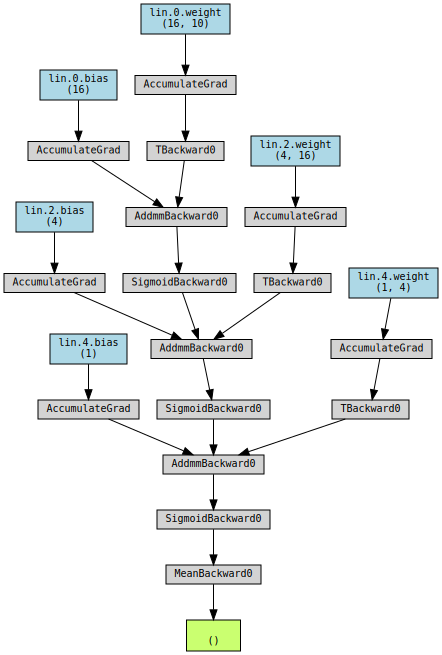

In [45]:
from torchviz import make_dot
x = torch.randn(64, 10)
y = model(x)

vis_graph = make_dot(y.mean(), params=dict(model.named_parameters()))
vis_graph

In [46]:

train_res=[0.0824,0.0401,0.0336,0.0300,0.0300,0.0300,0.0300,0.0300,0.0300,0.0301]
val_res=[0.1123,0.0478,0.0389,0.0297,0.0292,0.0292,0.0292,0.0292,0.0292,0.0292]

x = [i for i in range(1,11)]

fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=train_res,
                    mode='lines+markers',
                    name='Training loss'))
fig.add_trace(go.Scatter(x=x, y=val_res,
                    mode='lines+markers',
                    name='Validation loss'))
fig.update_layout(
    showlegend=True,
    xaxis=dict(type='category', title='Epoch'),
    yaxis=dict(type='linear', title = 'MSE Loss'))
fig.show()
